/var/folders/kr/fgbdxp1s36j5dsr37lwbcbj00000gn/T/ipykernel_11216/2736997379.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_names, y=anova_scores, palette='viridis')
/var/folders/kr/fgbdxp1s36j5dsr37lwbcbj00000gn/T/ipykernel_11216/2736997379.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_names, y=rfe_ranking, palette='viridis')
/var/folders/kr/fgbdxp1s36j5dsr37lwbcbj00000gn/T/ipykernel_11216/2736997379.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_names, y=rf_importances, palette='viridis')


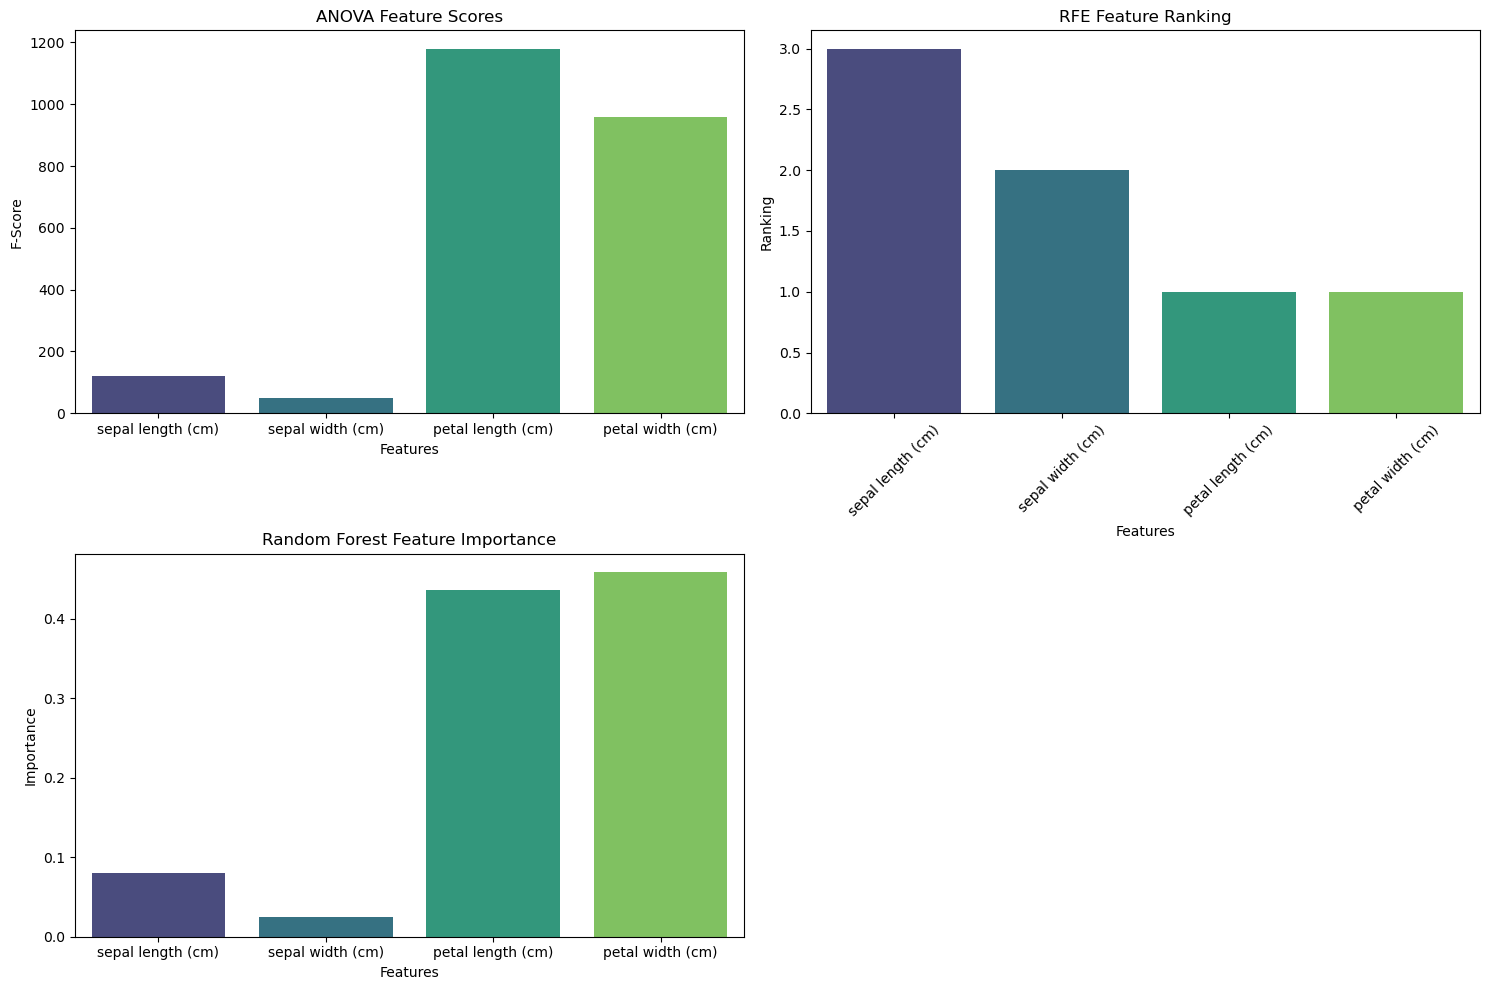

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# 1. Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Convert to DataFrame for better handling
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# 2. Perform ANOVA
anova = SelectKBest(f_classif, k=2)
anova.fit(X, y)
anova_scores = anova.scores_

# 3. Perform Recursive Feature Elimination (RFE)
model = LogisticRegression(max_iter=200)  # Increase max_iter for convergence
rfe = RFE(model, n_features_to_select=2)
rfe.fit(X, y)
rfe_support = rfe.support_
rfe_ranking = rfe.ranking_

# 4. Perform Feature Importance using Random Forest
rf = RandomForestClassifier()
rf.fit(X, y)
rf_importances = rf.feature_importances_

# 5. Visualization
plt.figure(figsize=(15, 10))

# ANOVA Scores
plt.subplot(2, 2, 1)
sns.barplot(x=feature_names, y=anova_scores, palette='viridis')
plt.title('ANOVA Feature Scores')
plt.ylabel('F-Score')
plt.xlabel('Features')

# RFE Support
plt.subplot(2, 2, 2)
sns.barplot(x=feature_names, y=rfe_ranking, palette='viridis')
plt.title('RFE Feature Ranking')
plt.ylabel('Ranking')
plt.xlabel('Features')
plt.xticks(rotation=45)

# Random Forest Feature Importance
plt.subplot(2, 2, 3)
sns.barplot(x=feature_names, y=rf_importances, palette='viridis')
plt.title('Random Forest Feature Importance')
plt.ylabel('Importance')
plt.xlabel('Features')

# Show all plots
plt.tight_layout()
plt.show()

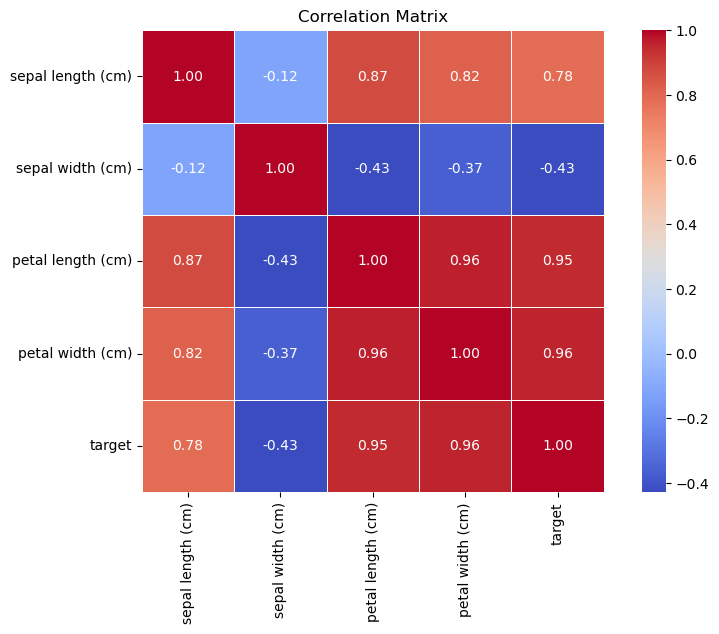

/var/folders/kr/fgbdxp1s36j5dsr37lwbcbj00000gn/T/ipykernel_11216/2157983025.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=df, palette='Set2')
/var/folders/kr/fgbdxp1s36j5dsr37lwbcbj00000gn/T/ipykernel_11216/2157983025.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=df, palette='Set2')
/var/folders/kr/fgbdxp1s36j5dsr37lwbcbj00000gn/T/ipykernel_11216/2157983025.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=df, palette='Set2')
/var/folders/kr/

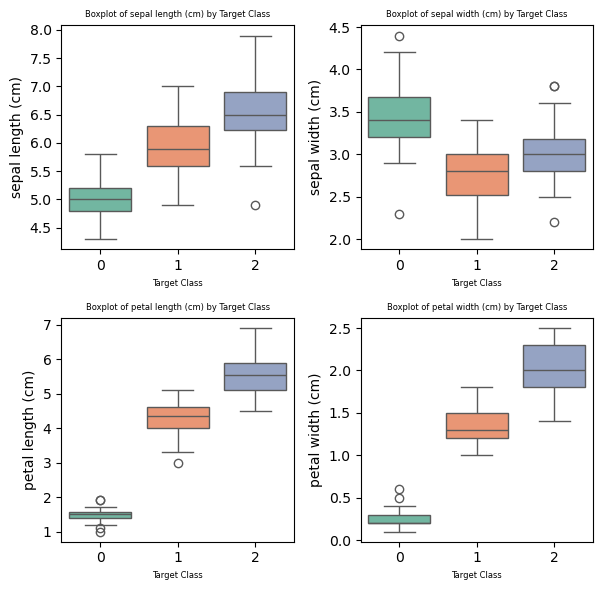

In [8]:
# Importing necessary libraries for correlation matrix and enhanced ANOVA visualization
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Correlation Matrix
# Calculating correlation matrix
correlation_matrix = df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# 2. Enhanced ANOVA Visualization
# Plotting the boxplots for each feature against the target variable
plt.figure(figsize=(6, 6))

for i, feature in enumerate(feature_names):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='target', y=feature, data=df, palette='Set2')
    plt.title(f'Boxplot of {feature} by Target Class', fontsize='6')
    plt.xlabel('Target Class', fontsize='6')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


/var/folders/kr/fgbdxp1s36j5dsr37lwbcbj00000gn/T/ipykernel_11216/297680317.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


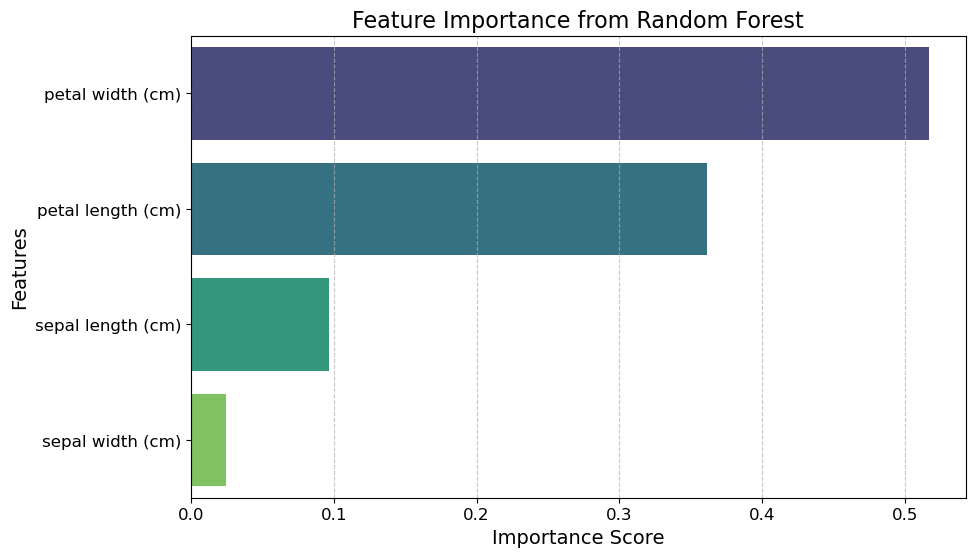

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Train Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X, y)

# Get feature importances
rf_importances = rf.feature_importances_

# Create a DataFrame for better handling
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': rf_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance from Random Forest', fontsize=16)
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

/var/folders/kr/fgbdxp1s36j5dsr37lwbcbj00000gn/T/ipykernel_11216/794521573.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Importance', y='Feature', data=importance_df, palette='coolwarm')


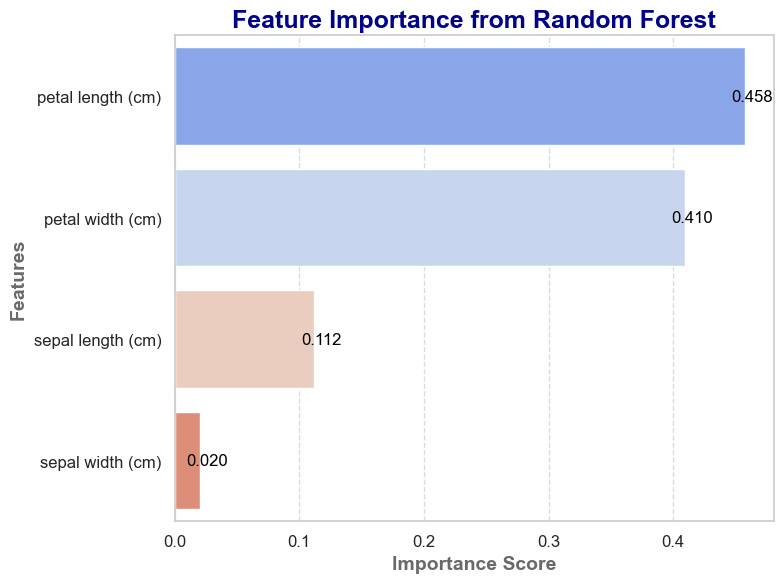

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Train Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X, y)

# Get feature importances
rf_importances = rf.feature_importances_

# Create a DataFrame for better handling
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': rf_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualization
plt.figure(figsize=(8, 6))
sns.set(style='whitegrid')  # Set background style
bar_plot = sns.barplot(x='Importance', y='Feature', data=importance_df, palette='coolwarm')

# Add annotations to bars
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_width():.3f}', 
                      (p.get_width(), p.get_y() + p.get_height() / 2), 
                      ha='center', va='center', 
                      fontsize=12, color='black', 
                      xytext=(5, 0), 
                      textcoords='offset points')

# Customize aesthetics
plt.title('Feature Importance from Random Forest', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Importance Score', fontsize=14, fontweight='bold', color='dimgray')
plt.ylabel('Features', fontsize=14, fontweight='bold', color='dimgray')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

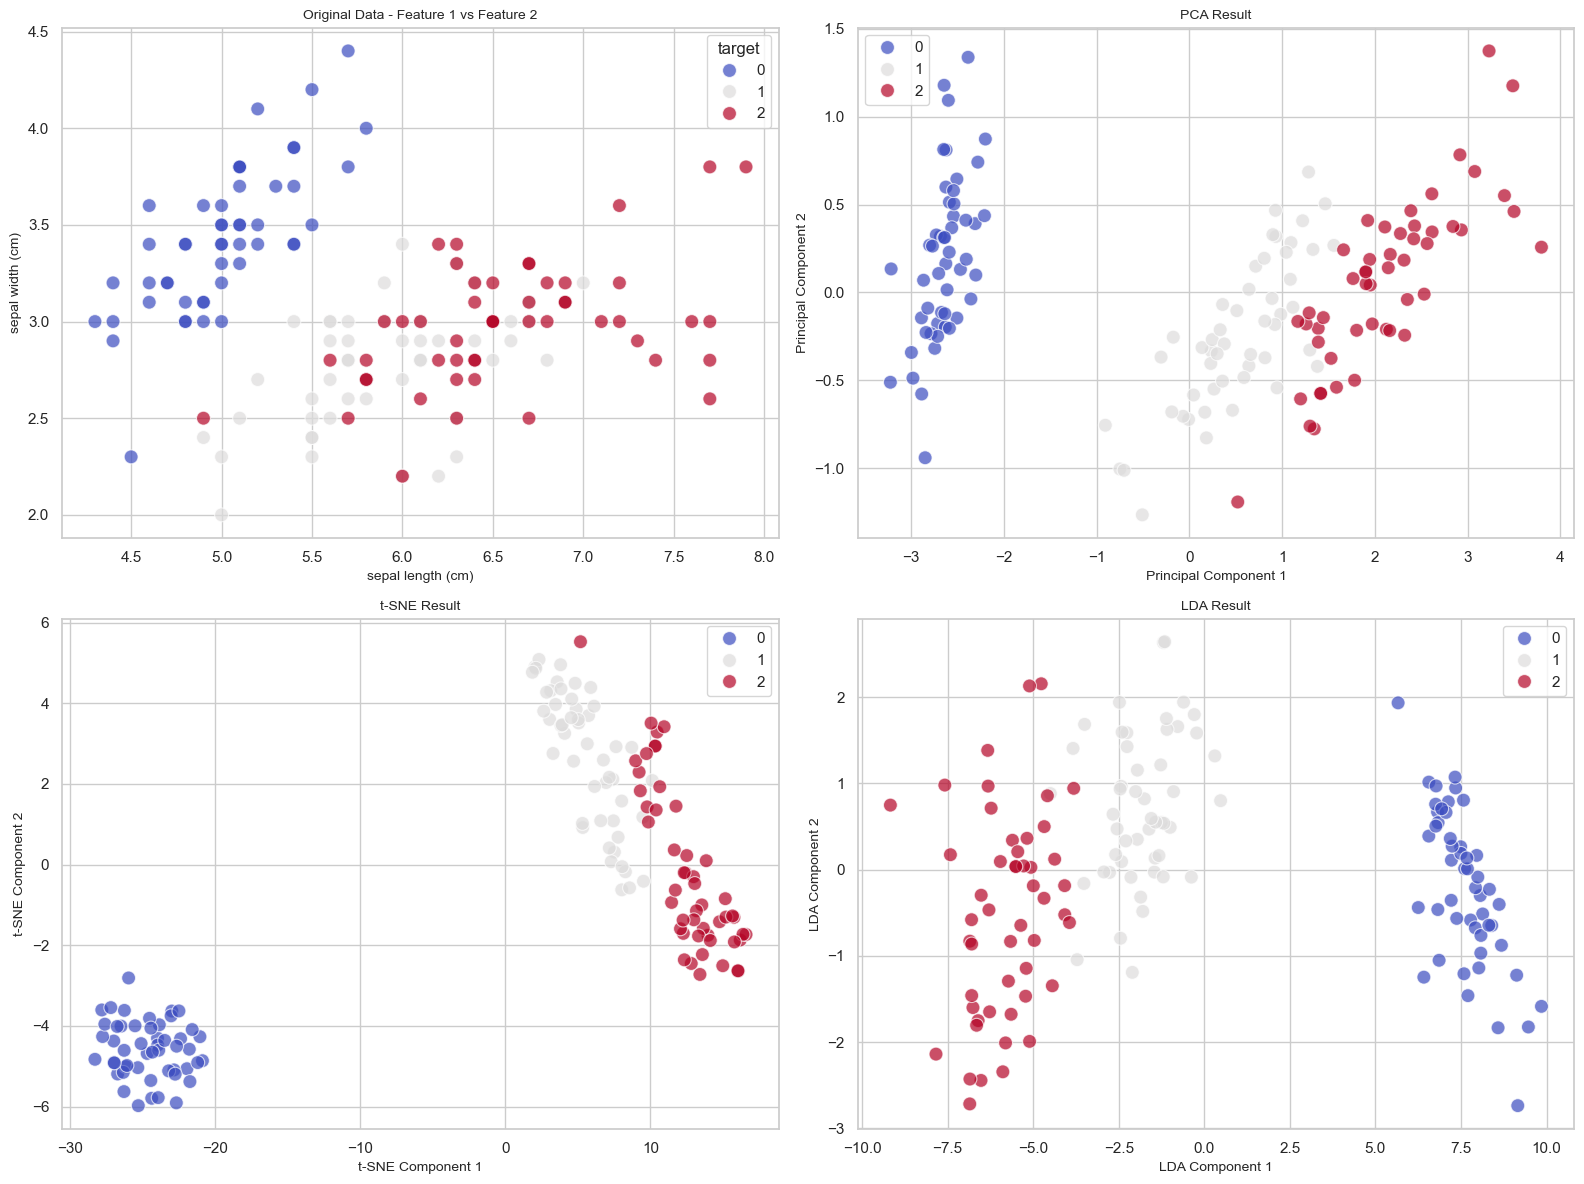

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 1. Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Convert to DataFrame for better handling
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# 2. PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 3. t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# 4. LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

# 5. Visualization
plt.figure(figsize=(16, 12))

# 원본 데이터 시각화
plt.subplot(2, 2, 1)
sns.scatterplot(x=df[feature_names[0]], y=df[feature_names[1]], hue=df['target'], palette='coolwarm', s=100, alpha=0.7)
plt.title('Original Data - Feature 1 vs Feature 2', fontsize=10)
plt.xlabel(feature_names[0], fontsize=10)
plt.ylabel(feature_names[1], fontsize=10)
plt.grid(True)

# PCA 시각화
plt.subplot(2, 2, 2)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='coolwarm', s=100, alpha=0.7)
plt.title('PCA Result', fontsize=10)
plt.xlabel('Principal Component 1', fontsize=10)
plt.ylabel('Principal Component 2', fontsize=10)
plt.grid(True)

# t-SNE 시각화
plt.subplot(2, 2, 3)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='coolwarm', s=100, alpha=0.7)
plt.title('t-SNE Result', fontsize=10)
plt.xlabel('t-SNE Component 1', fontsize=10)
plt.ylabel('t-SNE Component 2', fontsize=10)
plt.grid(True)

# LDA 시각화
plt.subplot(2, 2, 4)
sns.scatterplot(x=X_lda[:, 0], y=X_lda[:, 1], hue=y, palette='coolwarm', s=100, alpha=0.7)
plt.title('LDA Result', fontsize=10)
plt.xlabel('LDA Component 1', fontsize=10)
plt.ylabel('LDA Component 2', fontsize=10)
plt.grid(True)

plt.tight_layout()
plt.show()

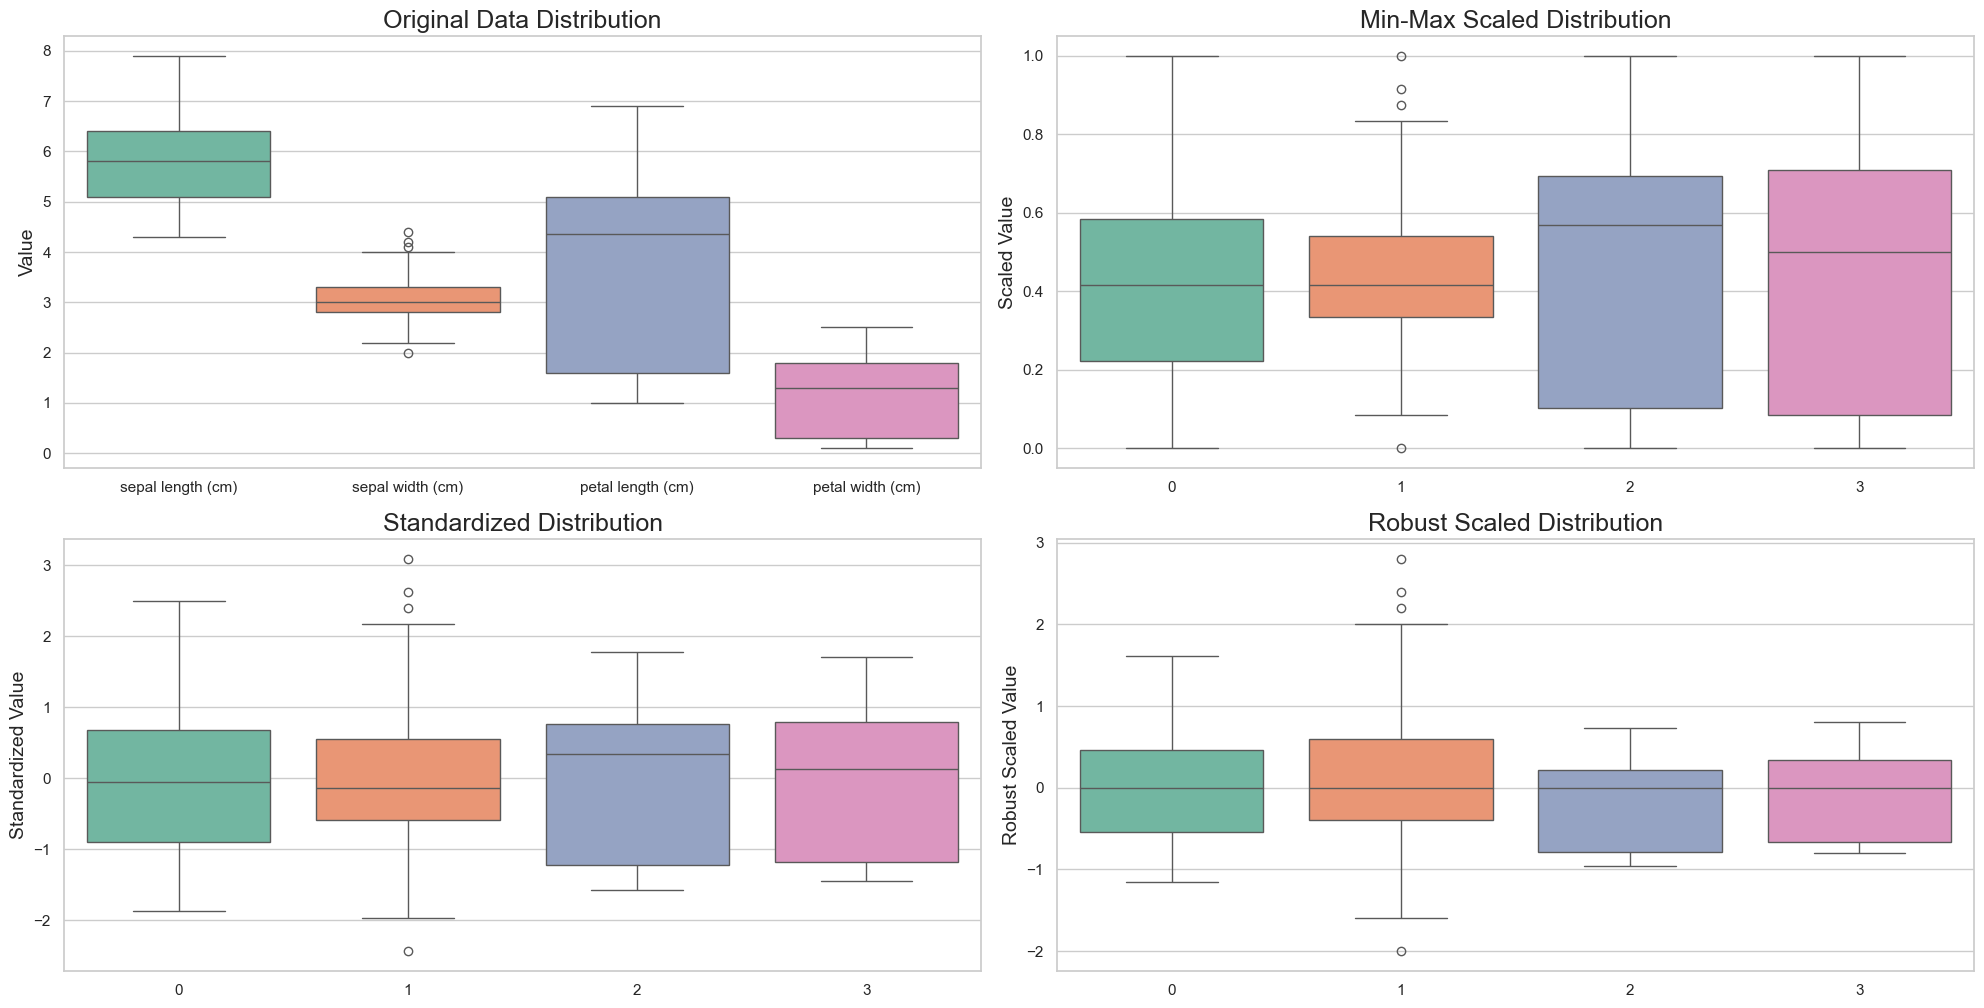

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# 1. Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Convert to DataFrame for better handling
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# 2. Apply different scaling methods
# Min-Max Scaling
min_max_scaler = MinMaxScaler()
data_min_max_scaled = min_max_scaler.fit_transform(X)

# Standardization
standard_scaler = StandardScaler()
data_standardized = standard_scaler.fit_transform(X)

# Robust Scaling
robust_scaler = RobustScaler()
data_robust_scaled = robust_scaler.fit_transform(X)

# 3. Visualization of original and scaled data
plt.figure(figsize=(20, 15))

# Original Data Distribution
plt.subplot(3, 2, 1)
sns.boxplot(data=df[feature_names], palette='Set2')
plt.title('Original Data Distribution', fontsize=18)
plt.ylabel('Value', fontsize=14)

# Min-Max Scaled Distribution
plt.subplot(3, 2, 2)
sns.boxplot(data=data_min_max_scaled, palette='Set2')
plt.title('Min-Max Scaled Distribution', fontsize=18)
plt.ylabel('Scaled Value', fontsize=14)

# Standardized Distribution
plt.subplot(3, 2, 3)
sns.boxplot(data=data_standardized, palette='Set2')
plt.title('Standardized Distribution', fontsize=18)
plt.ylabel('Standardized Value', fontsize=14)

# Robust Scaled Distribution
plt.subplot(3, 2, 4)
sns.boxplot(data=data_robust_scaled, palette='Set2')
plt.title('Robust Scaled Distribution', fontsize=18)
plt.ylabel('Robust Scaled Value', fontsize=14)

plt.tight_layout()
plt.show()

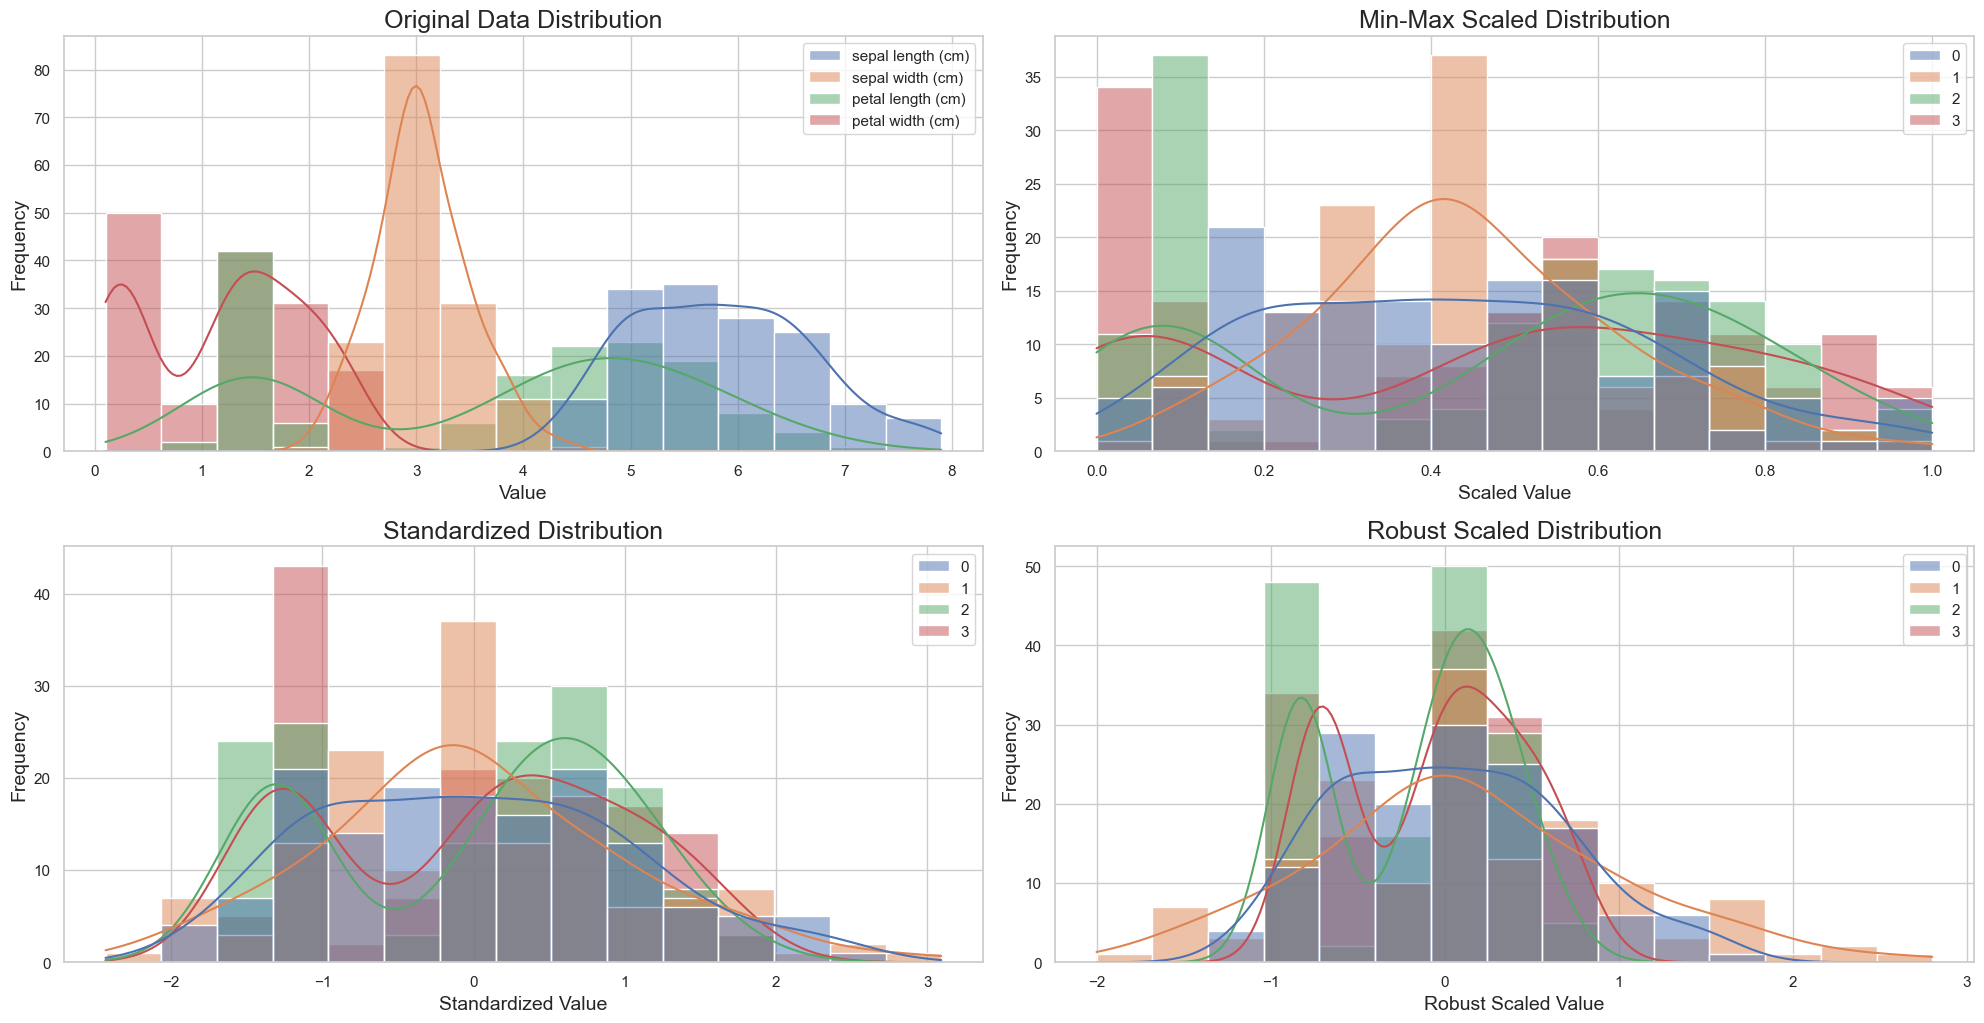

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# 1. Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Convert to DataFrame for better handling
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# 2. Apply different scaling methods
# Min-Max Scaling
min_max_scaler = MinMaxScaler()
data_min_max_scaled = min_max_scaler.fit_transform(X)

# Standardization
standard_scaler = StandardScaler()
data_standardized = standard_scaler.fit_transform(X)

# Robust Scaling
robust_scaler = RobustScaler()
data_robust_scaled = robust_scaler.fit_transform(X)

# 3. Visualization of original and scaled data using histplot
plt.figure(figsize=(20, 15))

# Original Data Distribution
plt.subplot(3, 2, 1)
sns.histplot(df[feature_names], bins=15, kde=True, color='#1f77b4')  # Blue
plt.title('Original Data Distribution', fontsize=18)
plt.xlabel('Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Min-Max Scaled Distribution
plt.subplot(3, 2, 2)
sns.histplot(data_min_max_scaled, bins=15, kde=True, color='#ff7f0e')  # Orange
plt.title('Min-Max Scaled Distribution', fontsize=18)
plt.xlabel('Scaled Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Standardized Distribution
plt.subplot(3, 2, 3)
sns.histplot(data_standardized, bins=15, kde=True, color='#2ca02c')  # Green
plt.title('Standardized Distribution', fontsize=18)
plt.xlabel('Standardized Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Robust Scaled Distribution
plt.subplot(3, 2, 4)
sns.histplot(data_robust_scaled, bins=15, kde=True, color='#d62728')  # Red
plt.title('Robust Scaled Distribution', fontsize=18)
plt.xlabel('Robust Scaled Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.tight_layout()
plt.show()